In [2]:
! pip install wordcloud

In [3]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup as soup
from wordcloud import WordCloud, STOPWORDS

`Linkedin dataset`

source: Ironhack

In [4]:
df_link = pd.read_csv("/Users/admin/Desktop/IRONHACK/3.WEEK/py_webscraping/data_set/df_link.csv")

In [5]:
df_link.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   job_title            710 non-null    object 
 1   company_name         710 non-null    object 
 2   posted_date          710 non-null    object 
 3   num_applications     710 non-null    int64  
 4   job_modality         663 non-null    object 
 5   f_p_time             518 non-null    object 
 6   job_responsibility   631 non-null    object 
 7   job_skills           597 non-null    object 
 8   job_keyword          710 non-null    object 
 9   city                 563 non-null    object 
 10  community_or_nation  576 non-null    object 
 11  country              676 non-null    object 
 12  annual_salary        92 non-null     float64
 13  offer_id             710 non-null    int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 77.8+ KB


### Original Dataset:
- `Columns:` 14
- `Rows:` 710

In [6]:
df_link.head()

,job_title,company_name,posted_date,num_applications,job_modality,f_p_time,job_responsibility,job_skills,job_keyword,city,community_or_nation,country,annual_salary,offer_id
0,Estadístico/a con experiencia en programación ...,Psicoanalista en Madrid,2024-03-06,80,Presencial,Jornada completa,NaN,"Análisis de datos estadísticos, Estadística, M...",Data Scientist,Madrid,Comunidad de Madrid,España,NaN,0
1,Analista de Datos/ Data Analyst - Centro de I+...,ALSA,2024-03-12,66,Híbrido,Jornada completa,Junior,"Analítica de datos, Bases de datos, Capacidad ...",Data Analyst,Gijón,Principado de Asturias,España,NaN,1
2,Consultor/a BI | Teletrabajo,ALTEN,2024-03-09,879,En remoto,Jornada completa,Intermedio,NaN,Data Analyst,Barcelona,Cataluña,España,NaN,2
3,Consultor BI,CGI,2024-03-12,76,Híbrido,Jornada completa,Intermedio,NaN,Data Analyst,Madrid,Comunidad de Madrid,España,NaN,3
4,Data Analyst,TD SYNNEX,2024-02-28,72,Híbrido,Jornada completa,Junior,NaN,Data Analyst,Barcelona,Cataluña,España,NaN,4


`Creating a DF with nedeeded columns`

In [7]:
select_columns = ['job_title', 'company_name', 'job_modality','f_p_time', 'job_responsibility', 'job_skills', 'job_keyword', 'city', 'country', 'annual_salary']
df = df_link[select_columns].copy()

In [8]:
df.shape

(710, 10)

- `Columns:` 10
- `Rows:` 710

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_title           710 non-null    object 
 1   company_name        710 non-null    object 
 2   job_modality        663 non-null    object 
 3   f_p_time            518 non-null    object 
 4   job_responsibility  631 non-null    object 
 5   job_skills          597 non-null    object 
 6   job_keyword         710 non-null    object 
 7   city                563 non-null    object 
 8   country             676 non-null    object 
 9   annual_salary       92 non-null     float64
dtypes: float64(1), object(9)
memory usage: 55.6+ KB


In [10]:
df.head()

,job_title,company_name,job_modality,f_p_time,job_responsibility,job_skills,job_keyword,city,country,annual_salary
0,Estadístico/a con experiencia en programación ...,Psicoanalista en Madrid,Presencial,Jornada completa,NaN,"Análisis de datos estadísticos, Estadística, M...",Data Scientist,Madrid,España,NaN
1,Analista de Datos/ Data Analyst - Centro de I+...,ALSA,Híbrido,Jornada completa,Junior,"Analítica de datos, Bases de datos, Capacidad ...",Data Analyst,Gijón,España,NaN
2,Consultor/a BI | Teletrabajo,ALTEN,En remoto,Jornada completa,Intermedio,NaN,Data Analyst,Barcelona,España,NaN
3,Consultor BI,CGI,Híbrido,Jornada completa,Intermedio,NaN,Data Analyst,Madrid,España,NaN
4,Data Analyst,TD SYNNEX,Híbrido,Jornada completa,Junior,NaN,Data Analyst,Barcelona,España,NaN


`Rename Columns`

In [11]:
#create a dict to applied rename(). Create a dict: original value as key and new value as value.
df.rename(columns={'f_p_time' : 'full_part_time',
                   'job_responsability':'seniority'
                  },
               inplace=True)

In [12]:
# create a new column with job search portal 
df['job_search'] = 'Linkedin'

In [13]:
df.head()

,job_title,company_name,job_modality,full_part_time,job_responsibility,job_skills,job_keyword,city,country,annual_salary,job_search
0,Estadístico/a con experiencia en programación ...,Psicoanalista en Madrid,Presencial,Jornada completa,NaN,"Análisis de datos estadísticos, Estadística, M...",Data Scientist,Madrid,España,NaN,Linkedin
1,Analista de Datos/ Data Analyst - Centro de I+...,ALSA,Híbrido,Jornada completa,Junior,"Analítica de datos, Bases de datos, Capacidad ...",Data Analyst,Gijón,España,NaN,Linkedin
2,Consultor/a BI | Teletrabajo,ALTEN,En remoto,Jornada completa,Intermedio,NaN,Data Analyst,Barcelona,España,NaN,Linkedin
3,Consultor BI,CGI,Híbrido,Jornada completa,Intermedio,NaN,Data Analyst,Madrid,España,NaN,Linkedin
4,Data Analyst,TD SYNNEX,Híbrido,Jornada completa,Junior,NaN,Data Analyst,Barcelona,España,NaN,Linkedin


### Data Wrangling on dataset obtained from webscraping

I plan to enhance the original Linkedin dataset by supplementing it with web scraping information.
Before join the dataset, it is necessary to clean the dataset obtained by web scraping from the job search portal Glassdoor.

In [14]:
ws = pd.read_excel("/Users/admin/Desktop/IRONHACK/3.WEEK/py_webscraping/data_set/glassdoor_fin.xlsx")

In [15]:
ws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        90 non-null     int64 
 1   company   90 non-null     object
 2   puesto    90 non-null     object
 3   locality  90 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.9+ KB


In [16]:
ws.rename(columns={'puesto':'job_title',
                   'company' : 'company_name',
                   'locality' : 'country',
                  },
               inplace=True)

In [17]:
ws.head()

,id,company_name,job_title,country
0,1,"DataForce by TransPerfect3,1",Dutch Language Data Annotator - Remote Spain,España
1,2,Nord Anglia Education,HR Data Analyst,Trabajo en remoto
2,3,"DataForce by TransPerfect3,1",Language Data Annotator/Content Generator Germ...,Barcelona
3,4,Polinex Inc.,Full-Stack Developer & Digital Marketing Speci...,Trabajo en remoto
4,5,"EMR CPR LLC3,4",Data Center Engineer,España


`Column: company_name`
- Remove the company ranking followed by the name of the company.

In [18]:
ws['company_name'] = ws['company_name'].str.split(r'\d|,').str[0].str.strip()

In [19]:
ws['company_name'].unique()

array(['DataForce by TransPerfect', 'Nord Anglia Education',
       'Polinex Inc.', 'EMR CPR LLC', 'NDC Elevator Drives',
       'Salute - EMEA', 'Teleperformance Spain', 'CrowdStrike',
       'Baxter Planning', 'Nextail', 'Abbott Laboratories',
       'Grupo Planeta', 'Kenos Technology', 'Americold Logistics',
       'Ruperts Farm SL', 'MphaR', 'AIS Group', 'White Swan Data',
       'Sartorius', 'Clarivate',
       "Institut d'Investigació Biomèdica de Girona Dr. Josep Trueta",
       'Engineers Sourcing', 'Q-tech', 'Mitsubishi Power Europe Ltd',
       'Schneider Electric', 'Johnson & Johnson', 'managementsolutions',
       'Dublin Simon Community', 'Microsoft', 'ZF',
       'Adisseo Nutricion Animal S.L.U.', 'EcoVadis', 'recognified',
       'Boston Consulting Group', 'Amadeus IT Group',
       'Loftus Bradford Executive Search S.L', 'M', 'Stalicla SA',
       'Spanish Engineers', 'Seedtag', 'Ansys', 'Bristol-Myers Squibb',
       'Semrush', 'Zurich Insurance', 'IQVIA', 'Procter & G

`Column: job_tittle:`
- Unify the names in categories

In [20]:
ws["job_title"].unique()

array(['Dutch Language Data Annotator - Remote Spain', 'HR Data Analyst',
       'Language Data Annotator/Content Generator German - Remote Spain',
       'Full-Stack Developer & Digital Marketing Specialist',
       'Data Center Engineer',
       'International Digital Marketing Executive',
       'Critical Facilities Engineer - Manager',
       'Nederlandse Junior Campagnespecialist – Google Ads',
       'Regional Sales Engineer, SIEM (Remote, ESP)',
       'Back End Engineer (hybrid)', 'Data Science Junior',
       'Software Engineer, EMR', 'Becario/a Data Analyst',
       'Junior Data Analyst', 'HRIS Lead', 'Customer Service',
       'Medical Writer',
       'Arabic Business Developer Representative (Google Products) - Barcelona',
       'DATA SCIENTIST JUNIOR', 'Field Researcher',
       'Fashion Customer Service Representative - Japanese',
       'Test Equipment Support (F/M)', 'Senior Data Scientist',
       'Administratiu/va Recerca Clínica - Data Entry',
       'Offline_4 Data

In [21]:
def limpiar_titulo(titulo):
    titulo = titulo.lower() # Convertir todo a minúsculas para facilitar el procesamiento
    
    # Eliminar detalles específicos y palabras clave comunes
    titulo = re.sub(r'\b(remote|spain|hybrid|german|google ads|barcelona|french|english|japanese|esp|relate|native speaker|f/m/d|m/f/x)\b', '', titulo)
    
    titulo = re.sub(r'[^a-zA-Z\s]', '', titulo) # Eliminar caracteres especiales y números
    
    titulo = ' '.join(word for word in titulo.split() if len(word) > 3) # Eliminar espacios adicionales y palabras cortas

    palabras_no_relevantes = ['spain', 'france', 'german', 'japanese', 'english', 'dutch', 'arabic', 'turkish', 'bcn', 'madrid', 'barcelona']
    for palabra in palabras_no_relevantes:
        titulo = titulo.replace(palabra, '')
    
    return titulo.strip()

ws['job_title'] = ws['job_title'].apply(limpiar_titulo)

In [22]:
ws['job_title'] = ws['job_title'].replace({
                                    'language data annotatorcontent generator':'data annotator',
                                    'language data annotator' : 'data annotator',
                                    'data center engineer' : 'data engineer',
                                    'critical facilities engineer manager' : 'data engineer manager',
                                    'business developer representative google products' : 'business developer',
                                    'administratiuva recerca clnica data entry' : 'data entry',
                                    'offline data scientist' : 'data science',
                                    'offer safety data scientist intern' : 'data science intern',
                                    'data science consultant corua' : 'data science consultant',
                                    'data science machine learning discovery program intern' : 'data science machine learning',
                                    'head technology data innovation' : 'data innovation',
                                    'language data curator' : 'data curator',
                                    'data analyst associate' : 'data analyst',
                                    'several open positions data centers construction projects' : 'data position',
                                    'data engineer datos team' : 'data engineer',
                                    'group head enterprise data architecture' : 'data architecture',
                                    'junior workday reporting analyst' : 'junior reporting analyst',
                                    'research associate technology media telecoms' : 'research analyst',
                                    'data entry operator': 'data entry',
                                    'data science talent program' : 'data science internship',
                                    'prcticas data management business analytics' : 'business analytics',
                                    'university data programa talento' : 'data analyst internship',
                                    'junior beca data analytics' : 'data analytics junior beca',
                                    'data analyst performance': 'data analyst',
                                    'head data analytics' : 'data analytics',
                                    'integrated sales marketing training data management' : 'training data management',
                                    'staff software engineer' : 'software engineer',
                                    'fullstack developer digital marketing specialist' : 'fullstack developer',
                                    'Data Engineer (BigData)': 'Data Engineer'})

In [23]:
ws['job_title'] = ws['job_title'].apply(lambda x: x.capitalize())

In [24]:
count_tittle = ws["job_title"].value_counts()
print(count_tittle)

job_title
Data analyst                                                       9
Data analyst internship                                            4
Junior data analyst                                                3
Data annotator                                                     2
Junior reporting analyst                                           2
                                                                  ..
Technical delivery analyst delivery                                1
Data innovation                                                    1
Data position                                                      1
Research analyst diligences                                        1
Seller support associate with spanish language virtual position    1
Name: count, Length: 65, dtype: int64


`Transform df and create a new column`
- rename column country in city because all the values corresponds to with Spain
- standarize records
- create country column with values Spain and Remote (because we know that every city corresponds to Spain)

2. `Column city:` Standardize records 

In [25]:
#1. rename column country in city because all the values are related with Spain
ws.rename(columns={'country': 'city'}, inplace=True)

In [26]:
ws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            90 non-null     int64 
 1   company_name  90 non-null     object
 2   job_title     90 non-null     object
 3   city          90 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.9+ KB


In [27]:
ws['city'].unique()

array(['España', 'Trabajo en remoto', 'Barcelona', 'Madrid', 'Plegamans',
       'Reus', 'Salt', 'Las Rozas de Madrid'], dtype=object)

In [28]:
ws['city'] = ws['city'].replace({'Trabajo en remoto' : 'Remote',
                                'Reus' : 'Barcelona',
                                'Plegamans' : 'Barcelona',
                                'Salt' : 'Barcelona',
                                'Las Rozas de Madrid' : 'Madrid'})

In [29]:
ws['city'].unique()

array(['España', 'Remote', 'Barcelona', 'Madrid'], dtype=object)

In [30]:
ws['city'] = ws['city'].str.strip()

In [31]:
count_city = ws["city"].value_counts()
print(count_city)

city
Barcelona    41
Madrid       24
España       14
Remote       11
Name: count, dtype: int64


In [32]:
ws['city'] = ws['city'].replace({'España': ""})

In [33]:
ws['city'].unique()

array(['', 'Remote', 'Barcelona', 'Madrid'], dtype=object)

In [34]:
# create a new column country with values spain
ws['country'] = None

In [35]:
"""
function to assign remote in country where city is remote 
and assign Spain for else
"""

def set_country(row):
    if row['city'] == 'Remote':
        return 'Remote'
    else:
        return 'Spain'

In [36]:
ws['country'] = ws.apply(set_country, axis=1)

In [37]:
ws['country'].unique()

array(['Spain', 'Remote'], dtype=object)

In [38]:
ws['country'].unique()

array(['Spain', 'Remote'], dtype=object)

In [39]:
# create a new column with job search portal 
ws['job_search'] = 'Glassdoor'

In [40]:
ws.head()

,id,company_name,job_title,city,country,job_search
0,1,DataForce by TransPerfect,Data annotator,,Spain,Glassdoor
1,2,Nord Anglia Education,Data analyst,Remote,Remote,Glassdoor
2,3,DataForce by TransPerfect,Data annotator,Barcelona,Spain,Glassdoor
3,4,Polinex Inc.,Fullstack developer,Remote,Remote,Glassdoor
4,5,EMR CPR LLC,Data engineer,,Spain,Glassdoor


In [41]:
drop_column = ['id']
ws = ws.drop(columns=drop_column)

In [42]:
ws.head()

,company_name,job_title,city,country,job_search
0,DataForce by TransPerfect,Data annotator,,Spain,Glassdoor
1,Nord Anglia Education,Data analyst,Remote,Remote,Glassdoor
2,DataForce by TransPerfect,Data annotator,Barcelona,Spain,Glassdoor
3,Polinex Inc.,Fullstack developer,Remote,Remote,Glassdoor
4,EMR CPR LLC,Data engineer,,Spain,Glassdoor


### Augmenting Linkedin Dataset with Glassdoor Information through Web Scraping

The objective is to integrate two datasets of job postings from job search portals, one corresponding to the previous month and another updated this week. By combining these datasets, we aim to obtain a general overview of the current state of the labor market.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_title           710 non-null    object 
 1   company_name        710 non-null    object 
 2   job_modality        663 non-null    object 
 3   full_part_time      518 non-null    object 
 4   job_responsibility  631 non-null    object 
 5   job_skills          597 non-null    object 
 6   job_keyword         710 non-null    object 
 7   city                563 non-null    object 
 8   country             676 non-null    object 
 9   annual_salary       92 non-null     float64
 10  job_search          710 non-null    object 
dtypes: float64(1), object(10)
memory usage: 61.1+ KB


In [44]:
ws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  90 non-null     object
 1   job_title     90 non-null     object
 2   city          90 non-null     object
 3   country       90 non-null     object
 4   job_search    90 non-null     object
dtypes: object(5)
memory usage: 3.6+ KB


In [45]:
#Concat dataframes:

final_df = pd.concat([df, ws], ignore_index=True)

In [46]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_title           800 non-null    object 
 1   company_name        800 non-null    object 
 2   job_modality        663 non-null    object 
 3   full_part_time      518 non-null    object 
 4   job_responsibility  631 non-null    object 
 5   job_skills          597 non-null    object 
 6   job_keyword         710 non-null    object 
 7   city                653 non-null    object 
 8   country             766 non-null    object 
 9   annual_salary       92 non-null     float64
 10  job_search          800 non-null    object 
dtypes: float64(1), object(10)
memory usage: 68.9+ KB


In [47]:
final_df.rename(columns={'job_responsibility':'job_responsability'}, inplace=True)

In [48]:
final_df['country'] = final_df['country'].replace({'Spain' : 'España'})

In [49]:
final_df['job_responsability'].value_counts()

job_responsability
Intermedio    369
Junior        177
Senior         85
Name: count, dtype: int64

### Visualization of dataset

1. Wich are the roles with more offers in the last months?

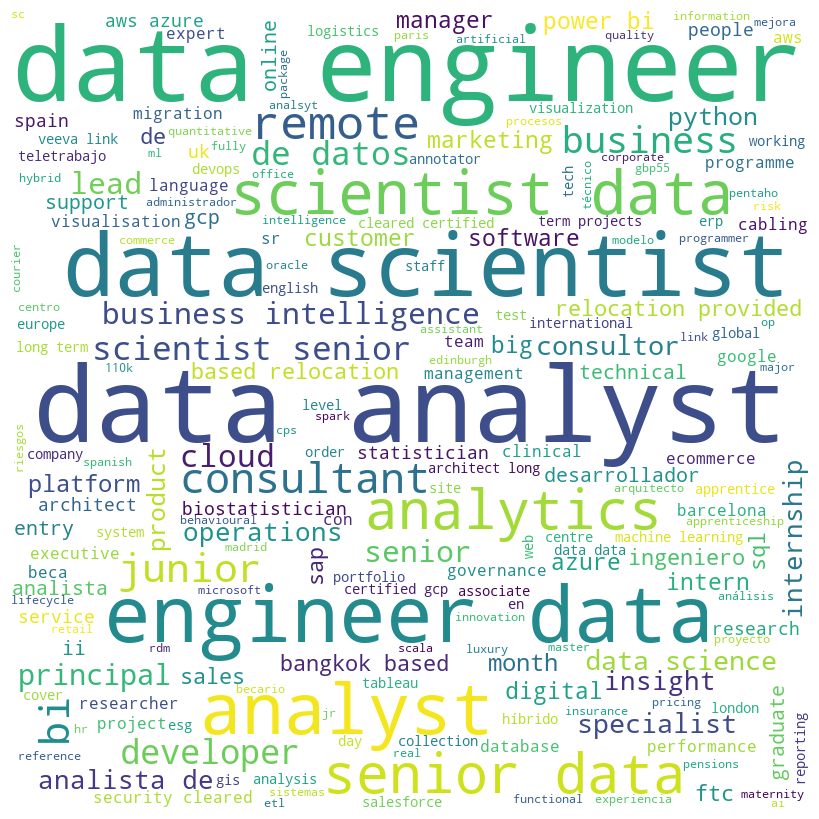

In [50]:
import string
from nltk.corpus import stopwords

comment_words = '' # Se inicializa una cadena vacía llamada comment_words que se utilizará para almacenar todas las palabras del texto.
stopwords = set(STOPWORDS) #Se crea un conjunto de palabras vacío llamado stopwords, que se utilizará para almacenar las palabras que se desean excluir del análisis de la nube de palabras.
all_letters = string.ascii_lowercase
stopwords.update(all_letters)

# iterate through the df 
for val in final_df.job_title:
     
    #Cada valor se convierte en una cadena para asegurarse de que se pueda manejar de manera consistente.
    val = str(val)
 
    # split the value in individuals words. Esto se hace dividiendo la cadena en espacios en blanco, lo que crea una lista de palabras individuales.
    tokens = val.split()
     
    # Converts each token into lowercase with a loop which iterate over token list and transform to lowercase.
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" " #Los tokens (palabras) convertidos a minúsculas se concatenan en la cadena comment_words, separados por espacios.

#se crea un objeto WordCloud utilizando la biblioteca WordCloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('wordcloud.png', bbox_inches='tight')
plt.show()

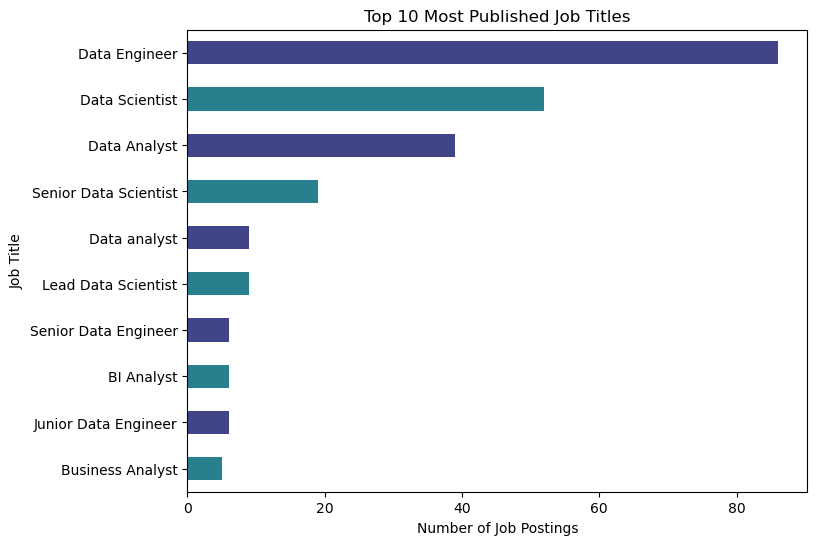

In [51]:
top_job_titles = final_df['job_title'].value_counts().head(10)

plt.figure(figsize=(8, 6))
top_job_titles.plot(kind='barh', color=['#404588', '#28808E'])
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Title')
plt.title('Top 10 Most Published Job Titles')
plt.gca().invert_yaxis()  # Invertimos el eje y para que el título con más publicaciones esté en la parte superior
plt.show()

In [52]:
pivot_table = final_df['job_title'].value_counts().head(10).reset_index()
pivot_table

pivot_table.to_csv('job_title_2.csv', index=True)

2. What is the most commonly requested level of responsibility?

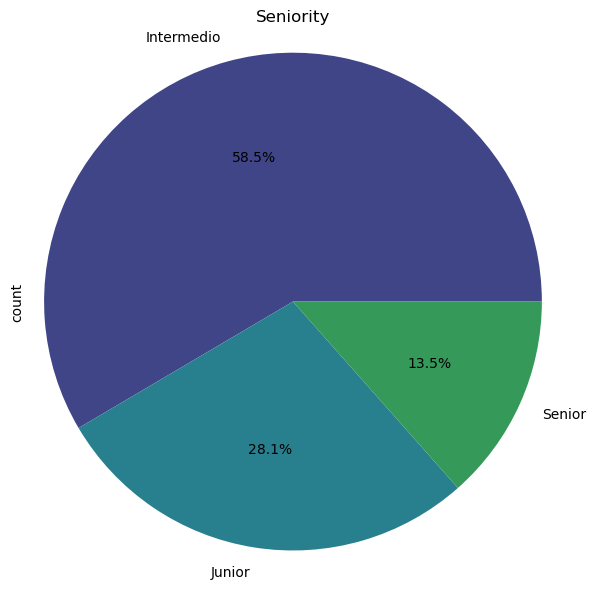

In [53]:
# Obtener los datos de las responsabilidades laborales
job_responsibility = final_df['job_responsability'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(6, 6))
job_responsibility.head(10).plot(kind='pie', autopct='%1.1f%%', colors=['#404588', '#28808E', '#35995A'])

# Añadir título
plt.title('Seniority')

# Mostrar el gráfico
plt.axis('equal')  # Hacer que el gráfico de torta sea circular
plt.tight_layout()
plt.show()
plt.close()  # Cerrar la figura después de mostrarla

In [54]:
pivot_table_2 = final_df.pivot_table(index='job_responsability', aggfunc='size')
pivot_table_2
pivot_table_2.to_csv('senioriry.csv', index=True)                

3. According to the three most offered jobs in search portals, the most required responsibilities are the following 

In [55]:
# Encuentra los tres títulos de trabajo más repetidos
top_job_titles = final_df['job_title'].value_counts().head(3).index.tolist()

# Crear un DataFrame vacío para almacenar los resultados
result_df = pd.DataFrame(columns=['job_title', 'job_responsability', 'frequency'])

# Iterar sobre los tres títulos de trabajo más repetidos
for job_title in top_job_titles:
    # Filtrar el DataFrame por el título de trabajo actual
    filtered_df = final_df[final_df['job_title'] == job_title]
    
    # Agrupar por el nivel de seniority y contar la frecuencia
    seniority_counts = filtered_df.groupby('job_responsability')['job_responsability'].count().reset_index(name='frequency')
    
    # Agregar el título de trabajo actual al DataFrame de resultados
    seniority_counts['job_title'] = job_title
    
    # Agregar los resultados al DataFrame final
    result_df = pd.concat([result_df, seniority_counts], ignore_index=True)

# Muestra los resultados
print("Frecuencia de seniority para los tres trabajos más comunes:")
print(result_df)

Frecuencia de seniority para los tres trabajos más comunes:
        job_title job_responsability frequency
0   Data Engineer         Intermedio        65
1   Data Engineer             Junior        14
2  Data Scientist         Intermedio        35
3  Data Scientist             Junior        10
4    Data Analyst         Intermedio        21
5    Data Analyst             Junior        11


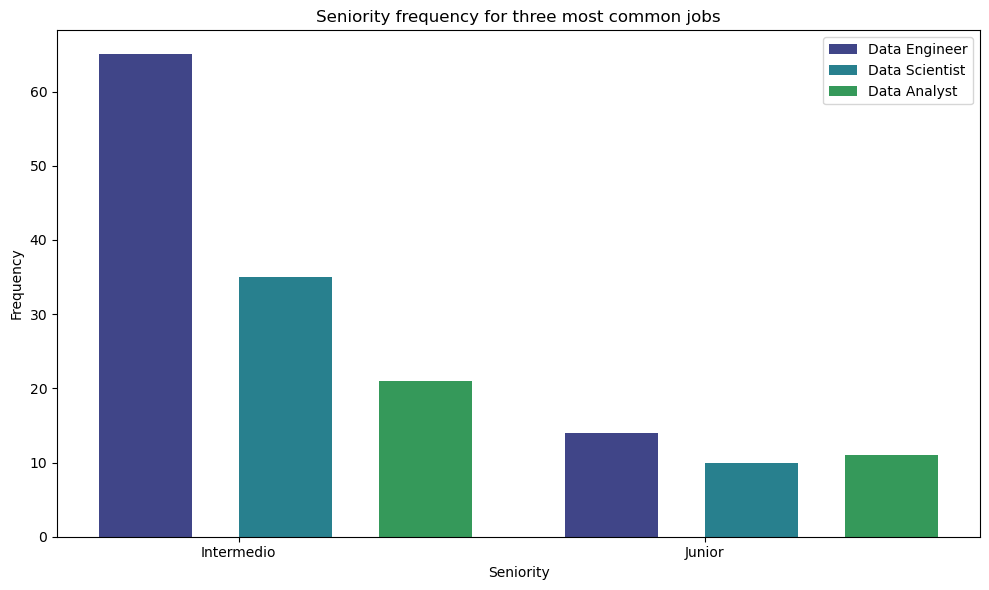

In [56]:
# Obtener las categorías de seniority únicas
seniority_categories = result_df['job_responsability'].unique()

# Calcular el número total de categorías de seniority
num_categories = len(seniority_categories)

# Calcular el ancho de las barras y la separación entre los grupos
bar_width = 0.2
space = 0.1

# Calcular la posición de cada grupo de barras
index = np.arange(num_categories)

# Definir los colores para cada título de trabajo
colors = ['#404588', '#28808E', '#35995A']

# Configurar el gráfico de barras
plt.figure(figsize=(10, 6))

# Iterar sobre cada título de trabajo y dibujar las barras correspondientes
for i, job_title in enumerate(top_job_titles):
    # Filtrar el DataFrame de resultados por el título de trabajo actual
    job_data = result_df[result_df['job_title'] == job_title]
    
    # Obtener las frecuencias de seniority para el título de trabajo actual
    frequencies = job_data['frequency']
    
    # Dibujar las barras para cada categoría de seniority con el color correspondiente
    plt.bar(index + i * (bar_width + space), frequencies, bar_width, label=job_title, color=colors[i])

# Configurar el título y las etiquetas de los ejes
plt.title('Seniority frequency for three most common jobs')
plt.xlabel('Seniority')
plt.ylabel('Frequency')
plt.xticks(index + bar_width, seniority_categories)

# Mostrar la leyenda
plt.legend()

# Ajustar el diseño y mostrar el gráfico de barras
plt.tight_layout()
plt.show()

In [57]:
# Crear un DataFrame con los datos del gráfico
graph_data = pd.DataFrame({
    'Seniority': seniority_categories,
    top_job_titles[0]: result_df[result_df['job_title'] == top_job_titles[0]]['frequency'].values,
    top_job_titles[1]: result_df[result_df['job_title'] == top_job_titles[1]]['frequency'].values,
    top_job_titles[2]: result_df[result_df['job_title'] == top_job_titles[2]]['frequency'].values
})

# Guardar los datos como un archivo CSV
graph_data.to_csv('seniority_frequency.csv', index=False)

2. What are the cities where the most job offers are published?

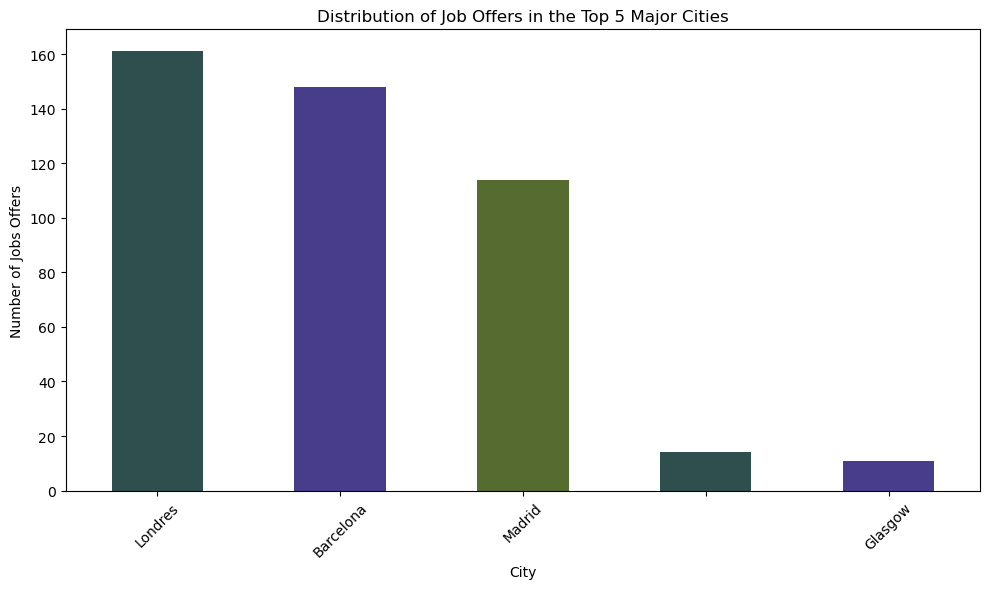

In [58]:
# Obtener los datos del top 5 de ciudades
top_5_cities = final_df['city'].value_counts().head(5)

# Crear el gráfico de barras para mostrar el top 5 de ciudades
plt.figure(figsize=(10, 6))
top_5_cities.plot(kind='bar', color=['#2F4F4F', '#483D8B', '#556B2F'])

# Añadir título y etiquetas
plt.title('Distribution of Job Offers in the Top 5 Major Cities')
plt.xlabel('City')
plt.ylabel('Number of Jobs Offers')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.show()

In [59]:
top_5_cities.to_csv('city.csv', index=False)

In [60]:
skills = pd.read_csv("/Users/admin/Desktop/IRONHACK/3.WEEK/df_skills.csv")

In [61]:
# Filtrar las filas correspondientes a Data Analyst, Data Scientist y Data Engineer
skills.drop(0, inplace=True)

In [62]:
skills.head()

,nombre_habilidad,Data Analyst,Data Analyst.1,Data Analyst.2,Data Engineer,Data Engineer.1,Data Engineer.2,Data Scientist,Data Scientist.1,Data Scientist.2,tipo_habilidad
1,Ciencia de datos,44,26,21,38,38,2,45,21,23,Hard Skill
2,Analítica de datos,52,72,7,14,17,2,18,10,14,Soft Skill
3,Bases de datos,26,40,4,37,24,11,4,1,1,Soft Skill
4,Ingeniería de datos,1,5,0,62,41,11,15,10,2,Hard Skill
5,Capacidad de análisis,37,54,6,12,7,0,8,1,16,Soft Skill


1. Wich are the most required skills for data analyst?

In [82]:
# Summing up counts for each skill across all variations
skills_summed = skills.groupby('nombre_habilidad').sum()

# Sorting the summed counts in descending order
habilidades_mas_requeridas = skills_summed.sum(axis=1).sort_values(ascending=False).head(10)
print(habilidades_mas_requeridas)

nombre_habilidad
Indicadores clave de desempeño    880010000Soft SkillIndicadores clave de desemp...
Datasets                          8100231210Soft SkillDatasets8100231210Soft Ski...
Presentaciones                    780030243Soft SkillPresentaciones780030243Soft...
Necesidades empresariales         736461110Soft SkillNecesidades empresariales73...
Calidad de datos                  732743010Soft SkillCalidad de datos732743010So...
Amazon Web Services (AWS)         7003004200Hard SkillAmazon Web Services (AWS)7...
Habilidades sociales              700110210Soft SkillHabilidades sociales7001102...
Conocimientos comerciales         680000000Soft SkillConocimientos comerciales68...
Ciencias de la computación        6059102464Hard SkillCiencias de la computación...
Almacenamiento de datos           53235265200Soft SkillAlmacenamiento de datos53...
dtype: object


In [83]:
habilidades_mas_requeridas.to_csv('skills_3.csv', index=False)

In [80]:
habilidades_mas_requeridas = skills['nombre_habilidad'].value_counts().sort_values(ascending=False).head(5)
print(habilidades_mas_requeridas)

nombre_habilidad
Ciencia de datos          1
Aprendizaje automático    1
Bases de datos            1
Ingeniería de datos       1
Capacidad de análisis     1
Name: count, dtype: int64


In [84]:
# Summing up counts for each skill across all variations
skills['total'] = skills.sum(axis=1)

# Sorting the DataFrame by the total column in descending order
habilidades_mas_requeridas = skills[['nombre_habilidad', 'total']].sort_values(by='total', ascending=False).head(5)

# Dropping the 'total' column
habilidades_mas_requeridas = habilidades_mas_requeridas.drop(columns=['total'])

# Displaying the resulting DataFrame
print(habilidades_mas_requeridas)

          nombre_habilidad
10             transformar
11            cargar (ETL)
32           Visualización
14  Visualización de datos
33       Trabajo en equipo


In [85]:
habilidades_mas_requeridas.to_csv('skills_3.csv', index=False)

In [75]:
skills['total'] = skills.sum(axis=1)

habilidades_mas_requeridas = skills[['nombre_habilidad', 'total']].sort_values(by='total', ascending=False)head(5)
habilidades_mas_requeridas

,nombre_habilidad,total
10,transformar,transformar1873543413100Soft Skilltransformar1...
11,cargar (ETL),cargar (ETL)1873543413100Soft Skillcargar (ETL...
32,Visualización,Visualización14201011202Soft SkillVisualizació...
14,Visualización de datos,Visualización de datos443136401377Soft SkillVi...
33,Trabajo en equipo,Trabajo en equipo2900701201Soft SkillTrabajo e...
...,...,...
12,Analítica,Analítica452123570765Hard SkillAnalítica452123...
2,Analítica de datos,Analítica de datos5272714172181014Soft SkillAn...
30,Amazon Web Services (AWS),Amazon Web Services (AWS)7003004200Hard SkillA...
73,Amazon Redshift,Amazon Redshift110610000Hard SkillAmazon Redsh...


In [64]:
top_5_habilidades.drop(55, inplace=True)

NameError: name 'top_5_habilidades' is not defined

In [67]:
habilidades_mas_requeridas

,nombre_habilidad,total
10,transformar,transformar1873543413100Soft Skill
11,cargar (ETL),cargar (ETL)1873543413100Soft Skill
32,Visualización,Visualización14201011202Soft Skill
14,Visualización de datos,Visualización de datos443136401377Soft Skill
33,Trabajo en equipo,Trabajo en equipo2900701201Soft Skill
...,...,...
12,Analítica,Analítica452123570765Hard Skill
2,Analítica de datos,Analítica de datos5272714172181014Soft Skill
30,Amazon Web Services (AWS),Amazon Web Services (AWS)7003004200Hard Skill
73,Amazon Redshift,Amazon Redshift110610000Hard Skill


In [74]:
habilidades_mas_requeridas.to_csv('skills_2.csv', index=False)

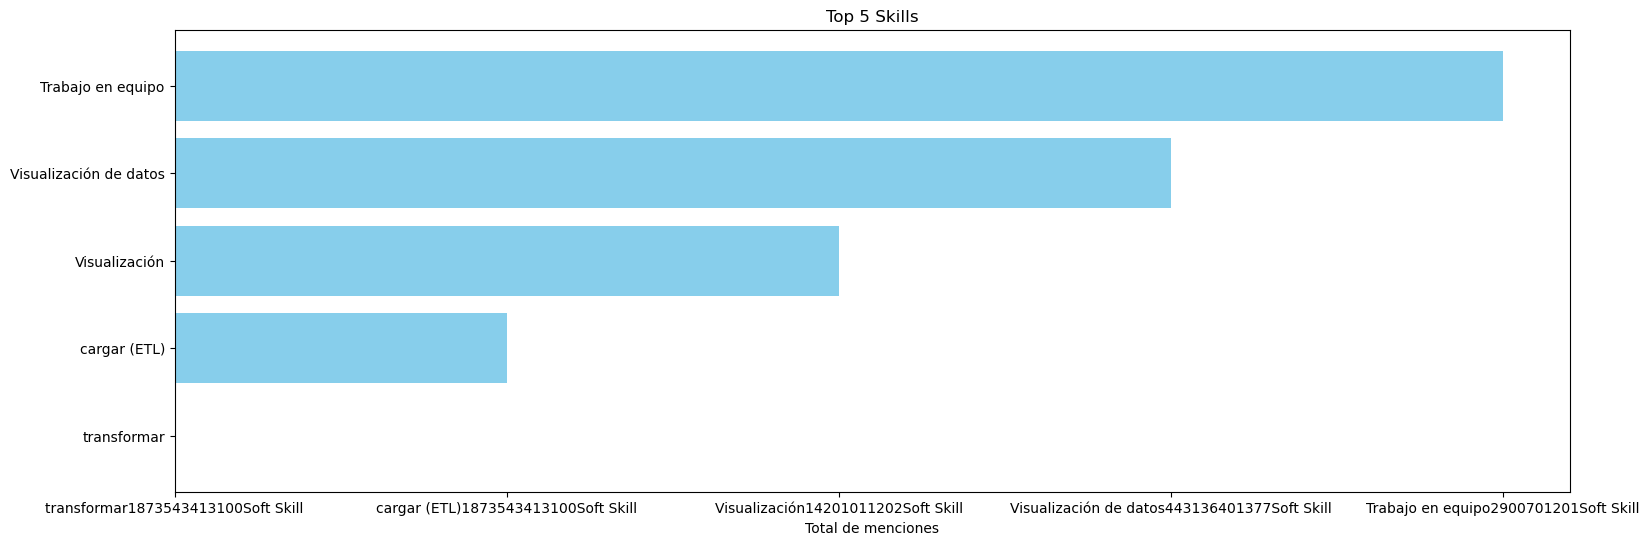

In [73]:
# Ordenar las habilidades por el total de menciones
habilidades_mas_requeridas = skills[['nombre_habilidad', 'total']].sort_values(by='total', ascending=False)

# Eliminar las filas donde el total de menciones sea 0
habilidades_mas_requeridas = habilidades_mas_requeridas[habilidades_mas_requeridas['total'] != 0]
habilidades_mas_requeridas.drop(55, inplace=True)

# Tomar solo las 5 habilidades más requeridas
top_5_habilidades = habilidades_mas_requeridas.head(5)

# Graficar las 5 habilidades más requeridas
plt.figure(figsize=(18, 6))
plt.barh(top_5_habilidades['nombre_habilidad'], top_5_habilidades['total'], color='skyblue')
plt.xlabel('Total de menciones')
plt.title('Top 5 Skills')
#plt.gca().invert_yaxis()  # Invertir el eje y para que la habilidad con más menciones esté en la parte superior
plt.show()

In [ ]:
skills.loc[skills['Data Analyst.1'].astype(str).astype(int).idxmax(),'nombre_habilidad']

In [ ]:
skills.loc[skills['Data Analyst.2'].astype(str).astype(int).idxmax(),'nombre_habilidad']

In [ ]:
skills.loc[skills['Data Engineer'].astype(str).astype(float).idxmax(),'nombre_habilidad']

In [ ]:
skills.loc[skills['Data Engineer.1'].astype(str).astype(float).idxmax(),'nombre_habilidad']

In [ ]:
skills.loc[skills['Data Engineer.2'].astype(str).astype(float).idxmax(),'nombre_habilidad']

In [ ]:
skills.loc[skills['Data Scientist'].astype(str).astype(float).idxmax(),'nombre_habilidad']

In [ ]:
skills.loc[skills['Data Scientist.1'].astype(str).astype(float).idxmax(),'nombre_habilidad']

In [ ]:
skills.loc[skills['Data Scientist.2'].astype(str).astype(float).idxmax(),'nombre_habilidad']